In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, auc

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
df['label'] = data.target

In [30]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(569, 31)

In [34]:
df.sample(5, random_state=42)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [37]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [40]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [4]:
df = df.astype(np.float16)

In [41]:
df.drop_duplicates().shape

(569, 31)

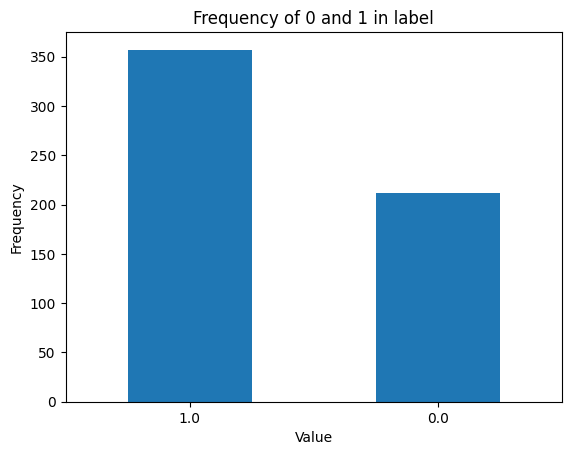

In [54]:
#label distribution
# Count the occurrences of each value
value_counts = df['label'].value_counts()

# Plotting
value_counts.plot(kind='bar')
plt.title('Frequency of 0 and 1 in label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

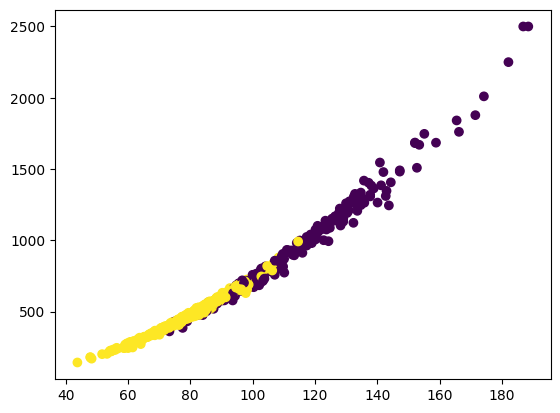

In [57]:
#plot a simple look of the data's distribution with two features
plt.scatter(df['mean perimeter'], df['mean area'], c=df['label'].values);

In [5]:
# Split the data into training and testing sets
y = df['label']
X = df.drop(['label'], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [7]:
#Normalisation
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [33]:
# Create a decision tree model
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

0.9534883720930233

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.9375

In [34]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [35]:
print("test accuracy: {} ".format(
	knn.fit(X_train, y_train).score(X_test, y_test)))
print("train accuracy: {} ".format(
	knn.fit(X_train, y_train).score(X_train, y_train)))

test accuracy: 0.9534883720930233 
train accuracy: 0.9855072463768116 


In [36]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        32
         1.0       0.96      0.96      0.96        54

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86



In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.9502314814814814

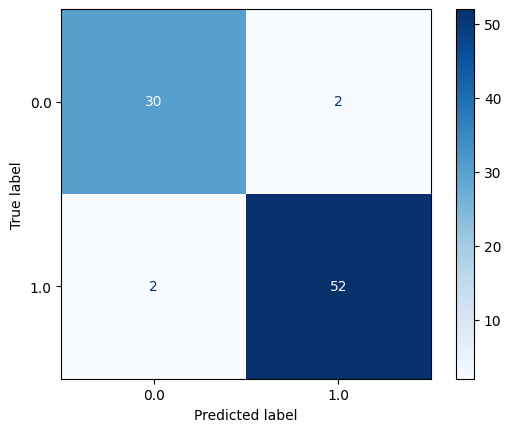

In [37]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create the confusion matrix display object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
# Plot the confusion matrix
cmd.plot(cmap='Blues')
plt.show()

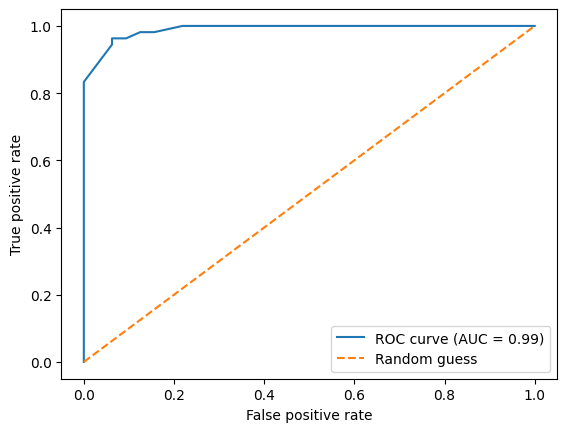

In [84]:
# Compute predicted probabilities of the positive class
y_proba = knn.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [88]:
#making predictions

feature_names = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
    'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',
    'mean fractal dimension', 'radius error', 'texture error', 'perimeter error',
    'area error', 'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]

def scale_input(user_input):
    scaler = MinMaxScaler()
    scaled_input = scaler.fit_transform(user_input.reshape(1, -1))
    return scaled_input

def predict_cancer_type(model, user_input):
    preprocessed_input = scale_input(user_input)
    prediction = model.predict(preprocessed_input)
    return prediction

def get_user_input():
    user_input = np.zeros(len(feature_names))

    # Get input from the user for each feature with validation
    for i, feature_name in enumerate(feature_names):
        while True:
            try:
                user_input[i] = float(input(f"Enter value for {feature_name}: "))
                break  # Break the loop if the input is valid
            except ValueError:
                print("Invalid input. Please enter a valid numerical value.")

    return user_input

def main():
    # Get input from the user
    user_input = get_user_input()

    # Make a prediction
    prediction = predict_cancer_type(knn, user_input)

    # Display the prediction label
    if prediction == 1:
        print("The predicted cancer type is: Malignant")
    else:
        print("The predicted cancer type is: Benign")

if __name__ == "__main__":
    main()


Enter value for mean radius: 17.99
Enter value for mean texture: 10.38
Enter value for mean perimeter: 122.80
Enter value for mean area: 1001
Enter value for mean smoothness: 0.11840
Enter value for mean compactness: 0.27760
Enter value for mean concavity: 0.3001
Enter value for mean concave points: 0.14710
Enter value for mean symmetry: 0.2419
Enter value for mean fractal dimension: 0.07871
Enter value for radius error: 1.0950
Enter value for texture error: 0.9053
Enter value for perimeter error: 8.589
Enter value for area error: 153.40
Enter value for smoothness error: 0.006399
Enter value for compactness error: 0.04904
Enter value for concavity error: 0.05373
Enter value for concave points error: 0.01587
Enter value for symmetry error: 0.03003
Enter value for fractal dimension error: 0.006193
Enter value for worst radius: 25.38
Enter value for worst texture: 17.33
Enter value for worst perimeter: 184.60
Enter value for worst area: 2019
Enter value for worst smoothness: 0.1622
Enter 